#1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


Research Question:

In this assignment, I will study the soccer database from 2008 to 2016 for many European nations. The data was retrieved through SQLite and combined using JOINs inside the program.

- What are the three leagues with the most victories from 2008 to 2016?
- Which clubs in the three leagues have won the most games? Who has the highest rating?
- What characteristics contribute to a player's total rating? What team characteristics result in the most victories?

#2. Loading Dataset
https://www.kaggle.com/datasets/hugomathien/soccer

In [2]:
df1 = pd.read_csv('Player.csv')

In [3]:
df2 = pd.read_csv('Player_Attributes.csv')

In [4]:
#merge df1 and df2
player = df1.merge(df2, on = 'player_api_id')

In [5]:
df3 = pd.read_csv('Team.csv')

In [6]:
df4 = pd.read_csv('Team_Attributes.csv')

In [7]:
#merge data df3 and df4
Team = df3.merge(df4, on = 'team_api_id')

In [8]:
Match = pd.read_csv('Match.csv')

# 3. Exploratory Data Analysis on Player dataset

In [9]:
player.head()

,id_x,player_api_id,player_name,player_fifa_api_id_x,birthday,height,weight,id_y,player_fifa_api_id_y,date,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,1,218353,2016-02-18 00:00:00,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,2,218353,2015-11-19 00:00:00,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,3,218353,2015-09-21 00:00:00,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,4,218353,2015-03-20 00:00:00,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,5,218353,2007-02-22 00:00:00,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [10]:
player.shape

(183978, 48)

In [11]:
player.nunique()

id_x                     11060
player_api_id            11060
player_name              10848
player_fifa_api_id_x     11060
birthday                  5762
height                      20
weight                      50
id_y                    183978
player_fifa_api_id_y     11062
date                       197
overall_rating              61
potential                   56
preferred_foot               2
attacking_work_rate          8
defensive_work_rate         19
crossing                    95
finishing                   97
heading_accuracy            96
short_passing               95
volleys                     93
dribbling                   97
curve                       92
free_kick_accuracy          97
long_passing                95
ball_control                93
acceleration                86
sprint_speed                85
agility                     81
reactions                   78
balance                     81
shot_power                  96
jumping                     79
stamina 

In [12]:
player.isnull().sum()

id_x                       0
player_api_id              0
player_name                0
player_fifa_api_id_x       0
birthday                   0
height                     0
weight                     0
id_y                       0
player_fifa_api_id_y       0
date                       0
overall_rating           836
potential                836
preferred_foot           836
attacking_work_rate     3230
defensive_work_rate      836
crossing                 836
finishing                836
heading_accuracy         836
short_passing            836
volleys                 2713
dribbling                836
curve                   2713
free_kick_accuracy       836
long_passing             836
ball_control             836
acceleration             836
sprint_speed             836
agility                 2713
reactions                836
balance                 2713
shot_power               836
jumping                 2713
stamina                  836
strength                 836
long_shots    

In [13]:
player.info

<bound method DataFrame.info of          id_x  player_api_id         player_name  player_fifa_api_id_x  \
0           1         505942  Aaron Appindangoye                218353   
1           1         505942  Aaron Appindangoye                218353   
2           1         505942  Aaron Appindangoye                218353   
3           1         505942  Aaron Appindangoye                218353   
4           1         505942  Aaron Appindangoye                218353   
...       ...            ...                 ...                   ...   
183973  11075          39902  Zvjezdan Misimovic                102359   
183974  11075          39902  Zvjezdan Misimovic                102359   
183975  11075          39902  Zvjezdan Misimovic                102359   
183976  11075          39902  Zvjezdan Misimovic                102359   
183977  11075          39902  Zvjezdan Misimovic                102359   

                   birthday  height  weight    id_y  player_fifa_api_id_y  \
0 

In [14]:
player.dropna(inplace = True)

In [15]:
player.info

<bound method DataFrame.info of          id_x  player_api_id         player_name  player_fifa_api_id_x  \
0           1         505942  Aaron Appindangoye                218353   
1           1         505942  Aaron Appindangoye                218353   
2           1         505942  Aaron Appindangoye                218353   
3           1         505942  Aaron Appindangoye                218353   
4           1         505942  Aaron Appindangoye                218353   
...       ...            ...                 ...                   ...   
183973  11075          39902  Zvjezdan Misimovic                102359   
183974  11075          39902  Zvjezdan Misimovic                102359   
183975  11075          39902  Zvjezdan Misimovic                102359   
183976  11075          39902  Zvjezdan Misimovic                102359   
183977  11075          39902  Zvjezdan Misimovic                102359   

                   birthday  height  weight    id_y  player_fifa_api_id_y  \
0 

In [16]:
player.isnull().sum()

id_x                    0
player_api_id           0
player_name             0
player_fifa_api_id_x    0
birthday                0
height                  0
weight                  0
id_y                    0
player_fifa_api_id_y    0
date                    0
overall_rating          0
potential               0
preferred_foot          0
attacking_work_rate     0
defensive_work_rate     0
crossing                0
finishing               0
heading_accuracy        0
short_passing           0
volleys                 0
dribbling               0
curve                   0
free_kick_accuracy      0
long_passing            0
ball_control            0
acceleration            0
sprint_speed            0
agility                 0
reactions               0
balance                 0
shot_power              0
jumping                 0
stamina                 0
strength                0
long_shots              0
aggression              0
interceptions           0
positioning             0
vision      

In [17]:
player.describe()

,id_x,player_api_id,player_fifa_api_id_x,height,weight,id_y,player_fifa_api_id_y,overall_rating,potential,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,...,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.00000
mean,5520.609207,137653.145514,166805.312530,181.877895,168.774593,91995.886274,166822.125803,68.635317,73.479457,55.142071,...,57.868176,54.933448,46.757433,50.354065,48.029342,14.696685,15.947786,20.526304,16.015043,16.32531
std,3190.378836,137599.735284,52825.971635,6.398588,15.098388,53092.657914,52821.443279,7.027950,6.581963,17.247231,...,15.152408,15.556645,21.226730,21.496289,21.592830,16.841454,15.841297,21.143898,16.070772,17.18545
min,1.000000,2625.000000,2.000000,157.480000,117.000000,1.000000,2.000000,33.000000,39.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000
25%,2758.000000,35451.000000,156593.000000,177.800000,159.000000,46074.250000,156616.000000,64.000000,69.000000,45.000000,...,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.00000
50%,5533.000000,80291.000000,183774.000000,182.880000,168.000000,92003.500000,183792.000000,69.000000,74.000000,59.000000,...,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,12.000000,11.000000,11.00000
75%,8253.000000,192841.000000,200130.000000,185.420000,179.000000,137935.750000,200138.000000,73.000000,78.000000,68.000000,...,69.000000,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.00000
max,11075.000000,750584.000000,234141.000000,208.280000,243.000000,183978.000000,234141.000000,94.000000,97.000000,95.000000,...,97.000000,96.000000,94.000000,95.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.00000


In [18]:
player.duplicated().any()

False

In [19]:
player.duplicated().sum()

0

In [20]:
#columns that have missing values
player.columns[player.isnull().any()]

Index([], dtype='object')

# 4. Exploratory Data Analysis on Team dataset

In [21]:
Team.head()

,id_x,team_api_id,team_fifa_api_id_x,team_long_name,team_short_name,id_y,team_fifa_api_id_y,date,buildUpPlaySpeed,buildUpPlaySpeedClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,9987,673.0,KRC Genk,GEN,485,673,2010-02-22 00:00:00,45,Balanced,...,60,Normal,Organised,70,High,65,Press,70,Wide,Cover
1,1,9987,673.0,KRC Genk,GEN,486,673,2011-02-22 00:00:00,66,Balanced,...,51,Normal,Organised,48,Medium,47,Press,54,Normal,Offside Trap
2,1,9987,673.0,KRC Genk,GEN,487,673,2012-02-22 00:00:00,53,Balanced,...,56,Normal,Organised,47,Medium,45,Press,55,Normal,Cover
3,1,9987,673.0,KRC Genk,GEN,488,673,2013-09-20 00:00:00,58,Balanced,...,56,Normal,Organised,47,Medium,45,Press,55,Normal,Cover
4,1,9987,673.0,KRC Genk,GEN,489,673,2014-09-19 00:00:00,58,Balanced,...,56,Normal,Organised,47,Medium,45,Press,55,Normal,Cover


In [22]:
Team.shape

(1458, 29)

In [23]:
Team.nunique()

id_x                               288
team_api_id                        288
team_fifa_api_id_x                 285
team_long_name                     285
team_short_name                    251
id_y                              1458
team_fifa_api_id_y                 285
date                                 6
buildUpPlaySpeed                    57
buildUpPlaySpeedClass                3
buildUpPlayDribbling                49
buildUpPlayDribblingClass            3
buildUpPlayPassing                  58
buildUpPlayPassingClass              3
buildUpPlayPositioningClass          2
chanceCreationPassing               50
chanceCreationPassingClass           3
chanceCreationCrossing              56
chanceCreationCrossingClass          3
chanceCreationShooting              57
chanceCreationShootingClass          3
chanceCreationPositioningClass       2
defencePressure                     48
defencePressureClass                 3
defenceAggression                   47
defenceAggressionClass   

In [24]:
Team.isnull().sum()

id_x                                0
team_api_id                         0
team_fifa_api_id_x                  0
team_long_name                      0
team_short_name                     0
id_y                                0
team_fifa_api_id_y                  0
date                                0
buildUpPlaySpeed                    0
buildUpPlaySpeedClass               0
buildUpPlayDribbling              969
buildUpPlayDribblingClass           0
buildUpPlayPassing                  0
buildUpPlayPassingClass             0
buildUpPlayPositioningClass         0
chanceCreationPassing               0
chanceCreationPassingClass          0
chanceCreationCrossing              0
chanceCreationCrossingClass         0
chanceCreationShooting              0
chanceCreationShootingClass         0
chanceCreationPositioningClass      0
defencePressure                     0
defencePressureClass                0
defenceAggression                   0
defenceAggressionClass              0
defenceTeamW

In [25]:
Team.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458 entries, 0 to 1457
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id_x                            1458 non-null   int64  
 1   team_api_id                     1458 non-null   int64  
 2   team_fifa_api_id_x              1458 non-null   float64
 3   team_long_name                  1458 non-null   object 
 4   team_short_name                 1458 non-null   object 
 5   id_y                            1458 non-null   int64  
 6   team_fifa_api_id_y              1458 non-null   int64  
 7   date                            1458 non-null   object 
 8   buildUpPlaySpeed                1458 non-null   int64  
 9   buildUpPlaySpeedClass           1458 non-null   object 
 10  buildUpPlayDribbling            489 non-null    float64
 11  buildUpPlayDribblingClass       1458 non-null   object 
 12  buildUpPlayPassing              14

In [26]:
Team.dropna(inplace = True)

In [27]:
Team.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 489 entries, 4 to 1457
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id_x                            489 non-null    int64  
 1   team_api_id                     489 non-null    int64  
 2   team_fifa_api_id_x              489 non-null    float64
 3   team_long_name                  489 non-null    object 
 4   team_short_name                 489 non-null    object 
 5   id_y                            489 non-null    int64  
 6   team_fifa_api_id_y              489 non-null    int64  
 7   date                            489 non-null    object 
 8   buildUpPlaySpeed                489 non-null    int64  
 9   buildUpPlaySpeedClass           489 non-null    object 
 10  buildUpPlayDribbling            489 non-null    float64
 11  buildUpPlayDribblingClass       489 non-null    object 
 12  buildUpPlayPassing              489

In [28]:
Team.describe()

,id_x,team_api_id,team_fifa_api_id_x,id_y,team_fifa_api_id_y,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
count,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000
mean,22771.777096,11301.245399,19274.509202,722.826176,19274.509202,54.100204,48.607362,49.372188,52.584867,53.094070,51.331288,45.233129,48.490798,51.611452
std,15054.945518,20902.931896,40697.893854,419.343252,40697.893854,9.791901,9.678290,10.271146,9.895637,9.938507,10.195058,8.877978,7.926689,7.573164
min,1.000000,1601.000000,1.000000,2.000000,1.000000,26.000000,24.000000,20.000000,21.000000,23.000000,22.000000,23.000000,24.000000,29.000000
25%,9548.000000,8426.000000,144.000000,363.000000,144.000000,48.000000,42.000000,41.000000,47.000000,48.000000,46.000000,39.000000,44.000000,48.000000
50%,20525.000000,8667.000000,571.000000,725.000000,571.000000,54.000000,49.000000,50.000000,53.000000,53.000000,52.000000,45.000000,48.000000,52.000000
75%,35294.000000,9904.000000,1904.000000,1081.000000,1904.000000,62.000000,55.000000,55.000000,59.000000,60.000000,57.000000,51.000000,54.000000,56.000000
max,50204.000000,274581.000000,112513.000000,1458.000000,112513.000000,80.000000,77.000000,79.000000,77.000000,80.000000,80.000000,72.000000,72.000000,73.000000


In [29]:
Team.duplicated().any()

False

In [30]:
Team.duplicated().sum()

0

In [31]:
Team.isnull().sum()

id_x                              0
team_api_id                       0
team_fifa_api_id_x                0
team_long_name                    0
team_short_name                   0
id_y                              0
team_fifa_api_id_y                0
date                              0
buildUpPlaySpeed                  0
buildUpPlaySpeedClass             0
buildUpPlayDribbling              0
buildUpPlayDribblingClass         0
buildUpPlayPassing                0
buildUpPlayPassingClass           0
buildUpPlayPositioningClass       0
chanceCreationPassing             0
chanceCreationPassingClass        0
chanceCreationCrossing            0
chanceCreationCrossingClass       0
chanceCreationShooting            0
chanceCreationShootingClass       0
chanceCreationPositioningClass    0
defencePressure                   0
defencePressureClass              0
defenceAggression                 0
defenceAggressionClass            0
defenceTeamWidth                  0
defenceTeamWidthClass       

In [32]:
Team.dtypes

id_x                                int64
team_api_id                         int64
team_fifa_api_id_x                float64
team_long_name                     object
team_short_name                    object
id_y                                int64
team_fifa_api_id_y                  int64
date                               object
buildUpPlaySpeed                    int64
buildUpPlaySpeedClass              object
buildUpPlayDribbling              float64
buildUpPlayDribblingClass          object
buildUpPlayPassing                  int64
buildUpPlayPassingClass            object
buildUpPlayPositioningClass        object
chanceCreationPassing               int64
chanceCreationPassingClass         object
chanceCreationCrossing              int64
chanceCreationCrossingClass        object
chanceCreationShooting              int64
chanceCreationShootingClass        object
chanceCreationPositioningClass     object
defencePressure                     int64
defencePressureClass              

In [33]:
#columns that have missing values
Team.columns[Team.isnull().any()]

Index([], dtype='object')

In [34]:
# 5. Exploratory Data Analysis on `Match` dataset

In [35]:
Match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [36]:
Match.shape

(25979, 115)

In [37]:
Match.nunique()

id            25979
country_id       11
league_id        11
season            8
stage            38
              ...  
GBD              84
GBA             172
BSH             101
BSD              59
BSA              96
Length: 115, dtype: int64

In [38]:
Match.isnull().sum()

id                0
country_id        0
league_id         0
season            0
stage             0
              ...  
GBD           11817
GBA           11817
BSH           11818
BSD           11818
BSA           11818
Length: 115, dtype: int64

In [39]:
Match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Columns: 115 entries, id to BSA
dtypes: float64(96), int64(9), object(10)
memory usage: 22.8+ MB


In [40]:
Match.dropna(inplace = True)

In [41]:
Match.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1762 entries, 3248 to 23416
Columns: 115 entries, id to BSA
dtypes: float64(96), int64(9), object(10)
memory usage: 1.6+ MB


In [42]:
Match.isnull().sum()

id            0
country_id    0
league_id     0
season        0
stage         0
             ..
GBD           0
GBA           0
BSH           0
BSD           0
BSA           0
Length: 115, dtype: int64

In [43]:
Match.drop_duplicates(inplace = True)

In [44]:
Match.duplicated().any()

False

In [45]:
Match.duplicated().sum()

0

In [46]:
#columns that have missing values
Match.columns[Match.isnull().any()]

Index([], dtype='object')

# 6. Data Cleaning Process

In [47]:
#Drop extraneous columns that are not relevant to our questions
#columns to drop in Matches.csv: 'goal', 'shoton', 'shotoff', 'foulcommit', 'card', 'cross', 'corner', 'possession', 
#'date' as there is no clean data in them , only comments
Match.drop(['goal', 'shoton', 'shotoff', 'foulcommit', 'card', 'cross', 'corner', 'possession', 'date'], axis=1, inplace=True)

In [48]:
Match.sample(4)

,id,country_id,league_id,season,stage,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
6545,6546,4769,4769,2012/2013,32,1217128,9831,9874,3,0,...,4.50,1.91,3.40,4.60,1.83,3.3,4.60,1.83,3.30,4.75
3512,3513,1729,1729,2012/2013,33,1229455,8456,8659,1,0,...,10.00,1.40,4.75,9.50,1.34,5.0,8.00,1.33,5.00,9.00
11892,11893,10257,10257,2012/2013,21,1287175,9878,9804,0,2,...,2.63,2.80,3.20,2.75,2.65,3.2,2.65,2.70,3.10,2.62
6363,6364,4769,4769,2012/2013,16,1216966,9851,8521,2,2,...,6.25,1.65,3.75,6.50,1.62,3.4,6.25,1.57,3.75,6.50


In [49]:
#columns to drop: 'preferred foot', 'date' and 'player_fifa_api_id'
player.drop(['preferred_foot', 'date'], axis = 1, inplace = True)

In [50]:
#columns to drop in Teams.csv: 'team short name', 'team long name','id', 'team_fifa_api_id', 'date'
#drop the names of the teams as the data is very innacurate, only 20 names provided out of 288
Team.drop(['team_short_name', 'team_long_name', 'date'], axis=1, inplace=True)

In [51]:
#rename columns Country and League in Matches.csv and convert them to lowercase
Match = Match.rename(columns = {'Country':'country', 'League':'league'})

#confirm changes
Match.head(3)

,id,country_id,league_id,season,stage,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
3248,3249,1729,1729,2012/2013,1,1228229,9825,8472,0,0,...,9.50,1.44,4.75,8.50,1.35,4.6,9.00,1.40,4.33,8.50
3249,3250,1729,1729,2012/2013,1,1228230,8668,10260,1,0,...,1.91,4.30,3.70,1.87,4.60,3.5,1.83,4.00,3.40,1.91
3250,3251,1729,1729,2012/2013,1,1228231,9879,9850,5,0,...,4.50,1.83,3.75,4.75,1.80,3.5,4.40,1.83,3.50,4.33


In [52]:
#drop rows with null values in Players
player.dropna(axis=0, how='any', inplace=True)
player.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180354 entries, 0 to 183977
Data columns (total 46 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id_x                  180354 non-null  int64  
 1   player_api_id         180354 non-null  int64  
 2   player_name           180354 non-null  object 
 3   player_fifa_api_id_x  180354 non-null  int64  
 4   birthday              180354 non-null  object 
 5   height                180354 non-null  float64
 6   weight                180354 non-null  int64  
 7   id_y                  180354 non-null  int64  
 8   player_fifa_api_id_y  180354 non-null  int64  
 9   overall_rating        180354 non-null  float64
 10  potential             180354 non-null  float64
 11  attacking_work_rate   180354 non-null  object 
 12  defensive_work_rate   180354 non-null  object 
 13  crossing              180354 non-null  float64
 14  finishing             180354 non-null  float64
 15  

In [53]:
#create a column in Matches to see which is the winner of the match
conditions = [(Match['home_team_goal'] > Match['away_team_goal']), (Match['home_team_goal'] < Match['away_team_goal'])]
choices = [Match['home_team_api_id'], Match['away_team_api_id']]
Match['winner'] = np.select(conditions, choices, default='draw')
Match.head()

,id,country_id,league_id,season,stage,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,...,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA,winner
3248,3249,1729,1729,2012/2013,1,1228229,9825,8472,0,0,...,1.44,4.75,8.50,1.35,4.60,9.00,1.40,4.33,8.50,draw
3249,3250,1729,1729,2012/2013,1,1228230,8668,10260,1,0,...,4.30,3.70,1.87,4.60,3.50,1.83,4.00,3.40,1.91,8668
3250,3251,1729,1729,2012/2013,1,1228231,9879,9850,5,0,...,1.83,3.75,4.75,1.80,3.50,4.40,1.83,3.50,4.33,9879
3251,3252,1729,1729,2012/2013,1,1228232,8456,8466,3,2,...,1.20,7.00,19.00,1.18,6.25,16.00,1.17,6.50,17.00,8456
3252,3253,1729,1729,2012/2013,1,1228233,10261,8586,2,1,...,2.62,3.40,2.75,2.60,3.30,2.75,2.50,3.40,2.70,10261


In [54]:
#drop the rows that contain 'draw' as they are not relevant for our analysis
Match = Match[Match.winner != 'draw']

In [55]:
#convert winner col to an int
Match['winner'] = Match['winner'].astype(int)

In [56]:
#confirm changes
Match.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1304 entries, 3249 to 23416
Columns: 107 entries, id to winner
dtypes: float64(96), int64(10), object(1)
memory usage: 1.1+ MB


In [57]:
Match['league_id'].value_counts()

21518    284
10257    271
1729     270
4769     252
7809     227
Name: league_id, dtype: int64

Text(0, 0.5, 'Wins')

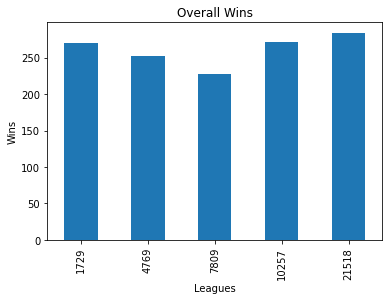

In [58]:
#plot the overall wins
Match.groupby('league_id')['winner'].count().plot(kind='bar', title='Overall Wins');
plt.xlabel('Leagues')
plt.ylabel('Wins')

Text(0.5, 1.0, 'Overall Wins')

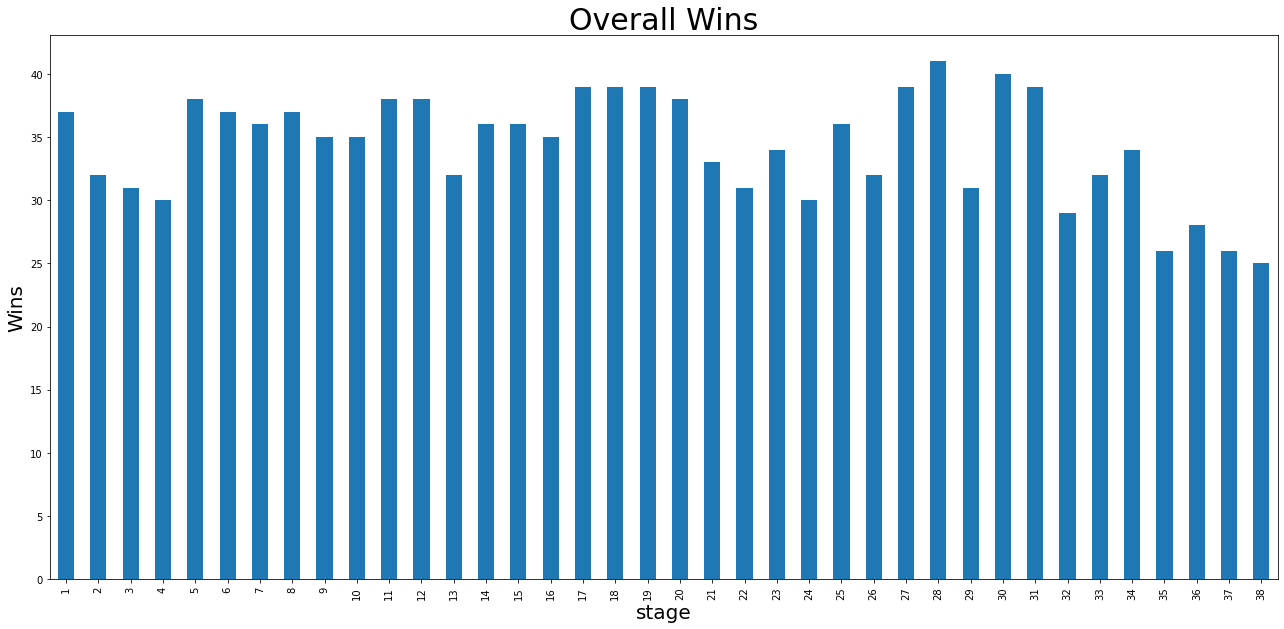

In [59]:
#plot the overall wins
Match.groupby('stage')['winner'].count().plot(kind='bar', figsize=(22,10));
plt.xlabel('stage', fontsize=20)
plt.ylabel('Wins', fontsize=20)
plt.title('Overall Wins', fontsize=30)

Research Question-1: Who is the most rated player?

In [60]:
player.head()

,id_x,player_api_id,player_name,player_fifa_api_id_x,birthday,height,weight,id_y,player_fifa_api_id_y,overall_rating,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,1,218353,67.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,2,218353,67.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,3,218353,62.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,4,218353,61.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,5,218353,61.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [61]:
#average rating
player['overall_rating'].mean()

68.63531720948801

In [62]:
#count players above average rating
above = player.query('overall_rating > overall_rating.mean()')
above['overall_rating'].count()

92427

In [63]:
#count players below average rating
below = player.query('overall_rating < overall_rating.mean()')
below['overall_rating'].count()

87927

In [64]:
#the most rated player
above.max()

id_x                                      11075
player_api_id                            722766
player_name             dos Santos Fabio Junior
player_fifa_api_id_x                     232693
birthday                    1999-02-25 00:00:00
height                                    203.2
weight                                      243
id_y                                     183978
player_fifa_api_id_y                     232693
overall_rating                             94.0
potential                                  97.0
attacking_work_rate                           y
defensive_work_rate                       tocky
crossing                                   95.0
finishing                                  97.0
heading_accuracy                           98.0
short_passing                              97.0
volleys                                    93.0
dribbling                                  97.0
curve                                      94.0
free_kick_accuracy                      

With an aggregate rating of 94, dos Santos Fabio Junior is the highest-rated player.

Research Question-2: What are the attributes that contribute to the players' overall rating?

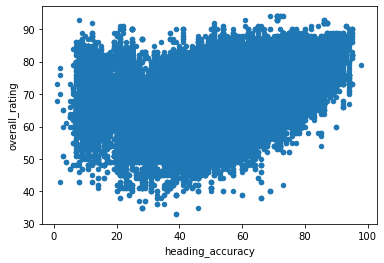

In [65]:
#relationship between rating and heading accuracy
player.plot(x='heading_accuracy', y='overall_rating', kind='scatter');

There is a positive correlation between heading accuracy and overall rating.

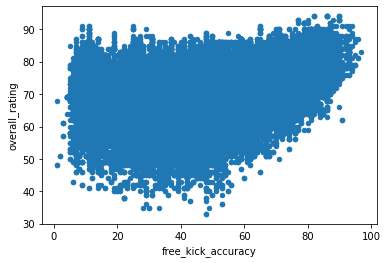

In [66]:
#relationship between rating and free kick accuracy
player.plot(x='free_kick_accuracy', y='overall_rating', kind='scatter');

Free kick accuracy doesn't have a strong impact in overall rating.

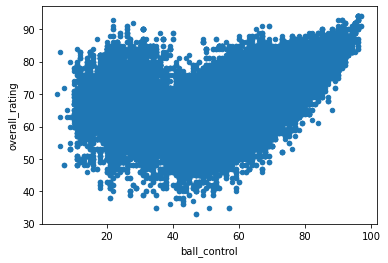

In [67]:
#relationship between rating and ball control
player.plot(x='ball_control', y='overall_rating', kind='scatter');


There is a strong positive correlation between overall rating and ball control.

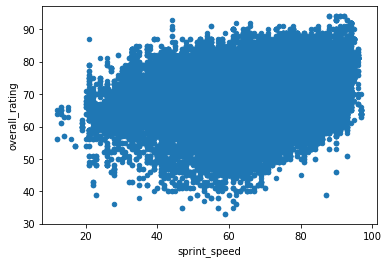

In [68]:
#relationship between rating and sprint speed
player.plot(x='sprint_speed', y='overall_rating', kind='scatter');

Strong positive correlation between overall rating and sprint speed.

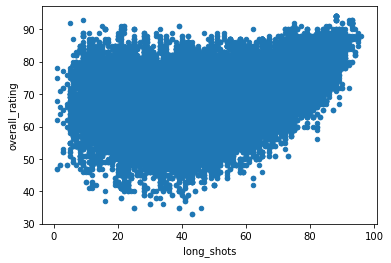

In [69]:
#relationship between rating and long shots
player.plot(x='long_shots', y='overall_rating', kind='scatter');

Positive correlation between long shots and overall rating.

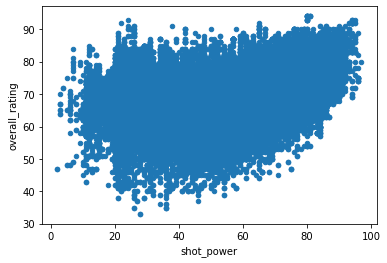

In [70]:
#relationship between rating and shot power
player.plot(x='shot_power', y='overall_rating', kind='scatter');


Strong correlation between shot power and overall rating.

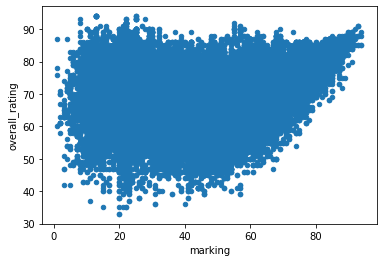

In [71]:
#relationship between rating and marking
player.plot(x='marking', y='overall_rating', kind='scatter');

I cannot assert that there is a link between marking and total grade.

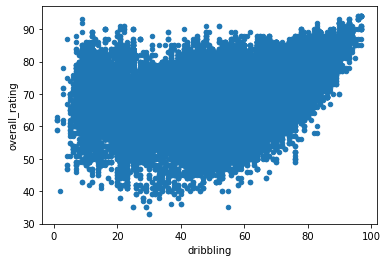

In [72]:
#relationship between rating and dribbling
player.plot(x='dribbling', y='overall_rating', kind='scatter');

Strong positive correlation between overall rating and dribbling.

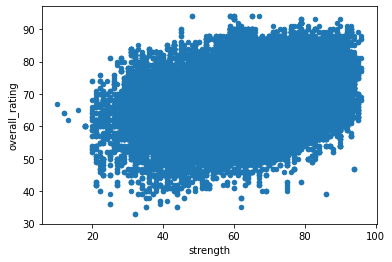

In [73]:
#relationship between rating and strength
player.plot(x='strength', y='overall_rating', kind='scatter');

- Strong link between strength and rating overall
- The following traits contribute to a player's total rating: heading accuracy, ball control, sprint speed, long shoots, shooting power, dribbling ability, and strength.
- Representation of 'attacking work rate' and 'defensive work rate' as a pie chart.

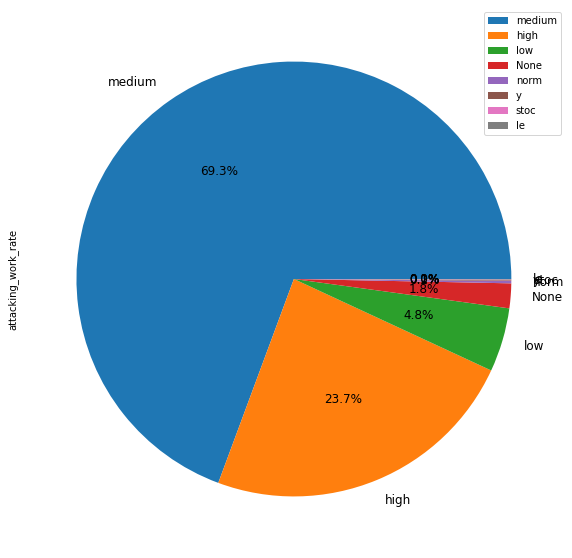

In [74]:
pieChart = player["attacking_work_rate"].value_counts().plot.pie(figsize=(10,10), autopct='%1.1f%%', fontsize = 12);
plt.legend();

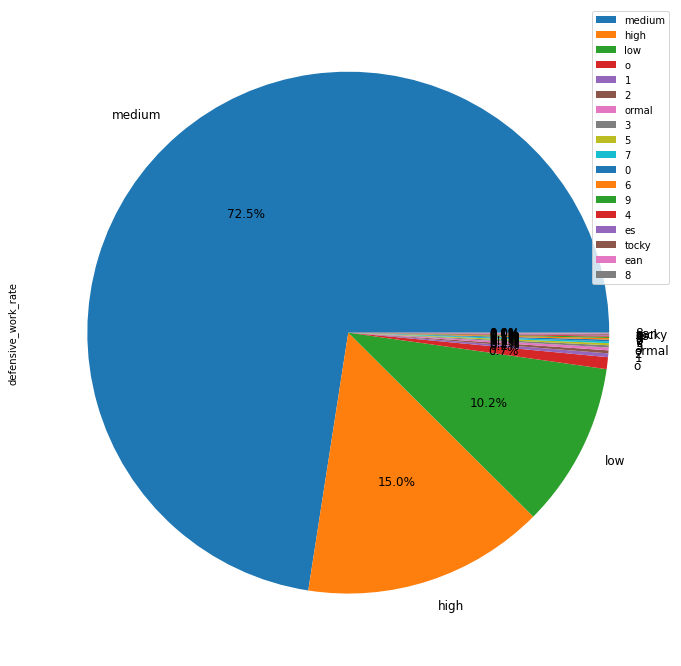

In [75]:
pieChart = player["defensive_work_rate"].value_counts().plot.pie(figsize=(12,12), autopct='%1.1f%%', fontsize = 12);
plt.legend();

Pie chart representation of team attribute.

In [76]:
Team.head(5)

,id_x,team_api_id,team_fifa_api_id_x,id_y,team_fifa_api_id_y,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
4,1,9987,673.0,489,673,58,Balanced,52.0,Normal,38,...,56,Normal,Organised,47,Medium,45,Press,55,Normal,Cover
5,1,9987,673.0,490,673,58,Balanced,52.0,Normal,38,...,56,Normal,Organised,36,Medium,57,Press,70,Wide,Cover
14,3,10000,15005.0,1457,15005,54,Balanced,42.0,Normal,51,...,32,Little,Organised,44,Medium,58,Press,37,Normal,Cover
15,3,10000,15005.0,1458,15005,54,Balanced,42.0,Normal,51,...,32,Little,Organised,44,Medium,58,Press,37,Normal,Cover
20,4,9994,2007.0,763,2007,62,Balanced,45.0,Normal,52,...,62,Normal,Organised,45,Medium,52,Press,52,Normal,Cover


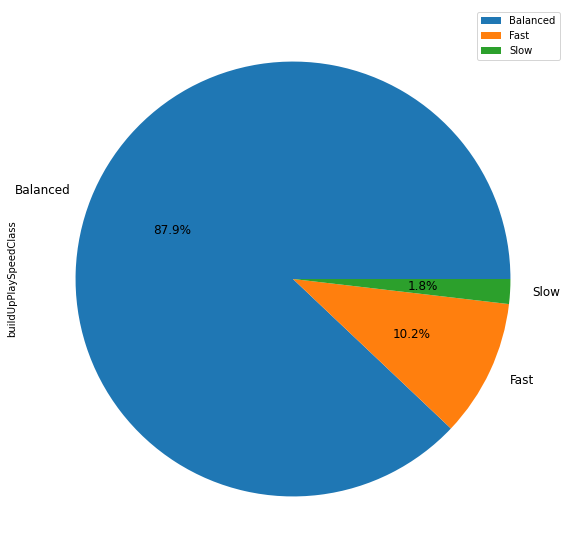

In [77]:
pieChart = Team["buildUpPlaySpeedClass"].value_counts().plot.pie(figsize=(10,10), autopct='%1.1f%%', fontsize = 12);
plt.legend();

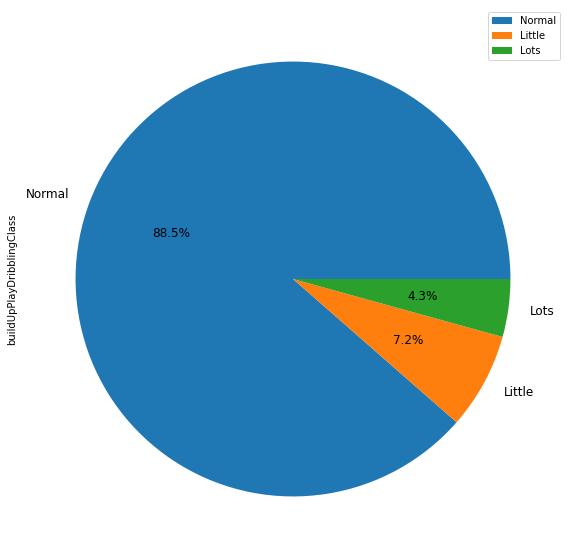

In [78]:
pieChart = Team["buildUpPlayDribblingClass"].value_counts().plot.pie(figsize=(10,10), autopct='%1.1f%%', fontsize = 12);
plt.legend();

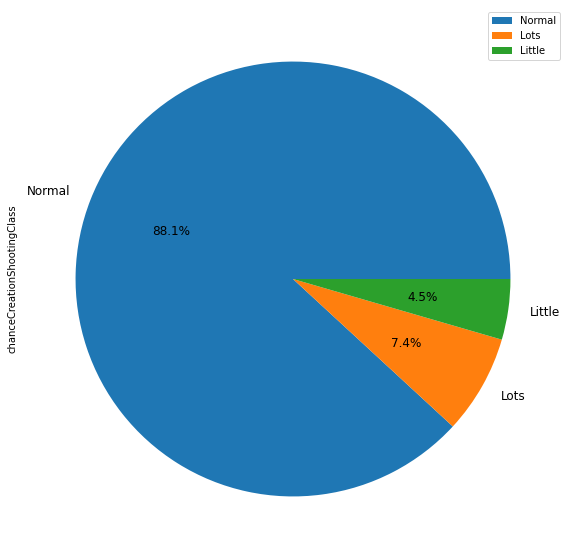

In [79]:
pieChart = Team["chanceCreationShootingClass"].value_counts().plot.pie(figsize=(10,10), autopct='%1.1f%%', fontsize = 12);
plt.legend();

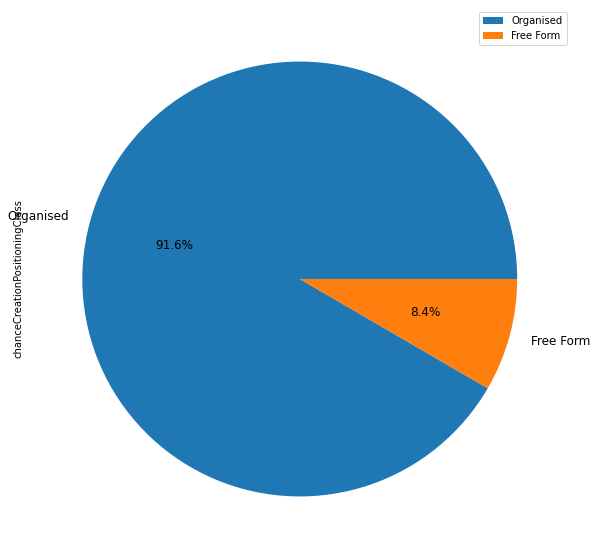

In [80]:
pieChart = Team["chanceCreationPositioningClass"].value_counts().plot.pie(figsize=(10,10), autopct='%1.1f%%', fontsize = 12);
plt.legend();

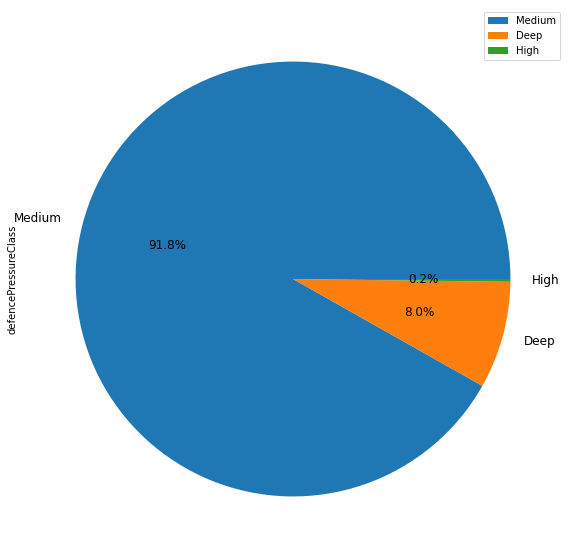

In [81]:
pieChart = Team["defencePressureClass"].value_counts().plot.pie(figsize=(10,10), autopct='%1.1f%%', fontsize = 12);
plt.legend();

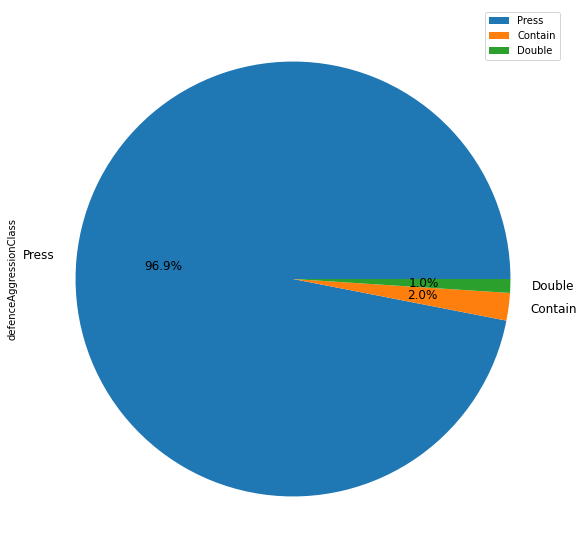

In [82]:
pieChart = Team["defenceAggressionClass"].value_counts().plot.pie(figsize=(10,10), autopct='%1.1f%%', fontsize = 12);
plt.legend();

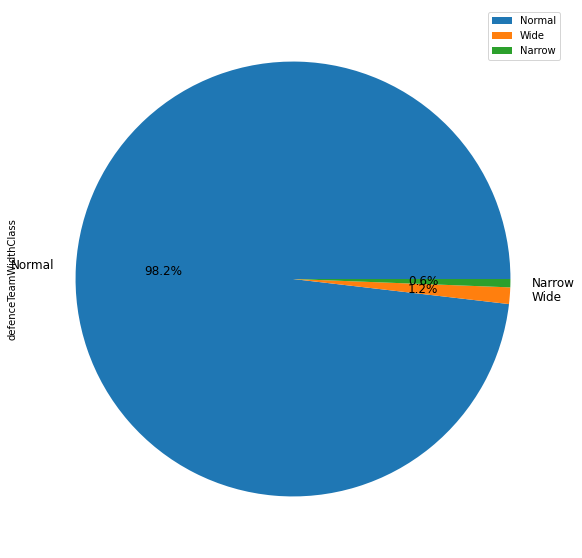

In [83]:
pieChart = Team["defenceTeamWidthClass"].value_counts().plot.pie(figsize=(10,10), autopct='%1.1f%%', fontsize = 12);
plt.legend();

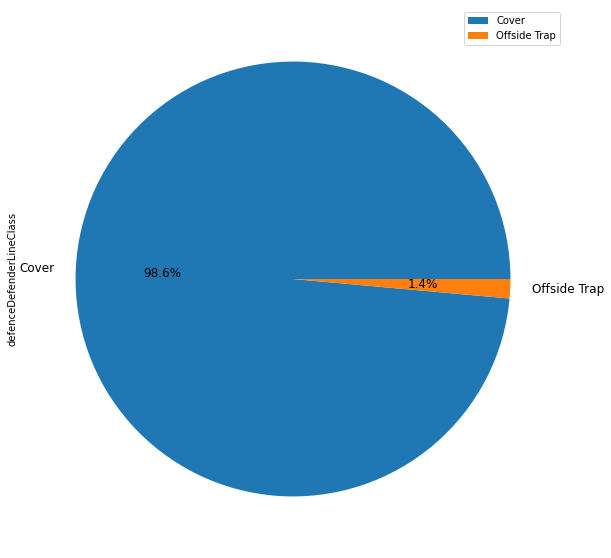

In [84]:
pieChart = Team["defenceDefenderLineClass"].value_counts().plot.pie(figsize=(10,10), autopct='%1.1f%%', fontsize = 12);
plt.legend();

Research Question-3: What team attributes lead to the most victories?

In [85]:
Team.head(1)

,id_x,team_api_id,team_fifa_api_id_x,id_y,team_fifa_api_id_y,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
4,1,9987,673.0,489,673,58,Balanced,52.0,Normal,38,...,56,Normal,Organised,47,Medium,45,Press,55,Normal,Cover


In [86]:
#check attributes of the best team in Spain
best_team_spain = Team.query('team_api_id == 8634')
best_team_spain

,id_x,team_api_id,team_fifa_api_id_x,id_y,team_fifa_api_id_y,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
1255,43042,8634,241.0,123,241,35,Balanced,35.0,Normal,32,...,35,Normal,Free Form,61,Medium,63,Press,65,Normal,Cover
1256,43042,8634,241.0,124,241,36,Balanced,35.0,Normal,51,...,56,Normal,Free Form,61,Medium,65,Press,65,Normal,Cover


In [87]:
#check attributes of the best team in England
best_team_england = Team.query('team_api_id == 10260')
best_team_england

,id_x,team_api_id,team_fifa_api_id_x,id_y,team_fifa_api_id_y,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
101,3457,10260,11.0,811,11,46,Balanced,34.0,Normal,54,...,56,Normal,Organised,42,Medium,41,Press,56,Normal,Cover
102,3457,10260,11.0,812,11,38,Balanced,42.0,Normal,44,...,40,Normal,Organised,54,Medium,53,Press,56,Normal,Cover


In [88]:
#check attributes of the best team in Italy
best_team_italy = Team.query('team_api_id == 9885')
best_team_italy

,id_x,team_api_id,team_fifa_api_id_x,id_y,team_fifa_api_id_y,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
715,20522,9885,45.0,629,45,26,Slow,47.0,Normal,24,...,72,Lots,Organised,23,Deep,67,Double,36,Normal,Cover
716,20522,9885,45.0,630,45,50,Balanced,35.0,Normal,20,...,80,Lots,Organised,35,Medium,65,Press,35,Normal,Cover


In [89]:
#merge dataframes
best_teams = best_team_spain.append(best_team_england, ignore_index=True)
best_teams = best_teams.append(best_team_italy, ignore_index=True)
best_teams.head(6)

/var/folders/70/xyz7khq54gx8qklx52wtt6tw0000gn/T/ipykernel_37034/1689909838.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_teams = best_team_spain.append(best_team_england, ignore_index=True)
/var/folders/70/xyz7khq54gx8qklx52wtt6tw0000gn/T/ipykernel_37034/1689909838.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_teams = best_teams.append(best_team_italy, ignore_index=True)


,id_x,team_api_id,team_fifa_api_id_x,id_y,team_fifa_api_id_y,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,43042,8634,241.0,123,241,35,Balanced,35.0,Normal,32,...,35,Normal,Free Form,61,Medium,63,Press,65,Normal,Cover
1,43042,8634,241.0,124,241,36,Balanced,35.0,Normal,51,...,56,Normal,Free Form,61,Medium,65,Press,65,Normal,Cover
2,3457,10260,11.0,811,11,46,Balanced,34.0,Normal,54,...,56,Normal,Organised,42,Medium,41,Press,56,Normal,Cover
3,3457,10260,11.0,812,11,38,Balanced,42.0,Normal,44,...,40,Normal,Organised,54,Medium,53,Press,56,Normal,Cover
4,20522,9885,45.0,629,45,26,Slow,47.0,Normal,24,...,72,Lots,Organised,23,Deep,67,Double,36,Normal,Cover
5,20522,9885,45.0,630,45,50,Balanced,35.0,Normal,20,...,80,Lots,Organised,35,Medium,65,Press,35,Normal,Cover


I would suggest that the success of the greatest teams may be attributed to a well-balanced play tempo and an organized position.

# Challenges

- Due to the inaccuracy of the data, I encountered various restrictions and obstacles throughout the study of this project.

- The names of the players were partial, since some lacked last names and had just first names, while others were altogether absent. In addition, I was unable to connect the players to the teams since there was no association between them.

- The team names were lacking, thus the study was based only on IDs; as a result, I am unable to clearly depict which teams I belong to.

# Analysis Summary

- Spain, England, and Italy were the top leagues in Europe from 2008 to 2016, according to my research. The top clubs have won around 200 games throughout this time span.

- A player's average rating is 68, and there are more players with ratings above average than below average. The following player characteristics contribute to this rating: heading accuracy, ball control, sprint speed, long shoots, shooting power, dribbling ability, and strength.

- The success of the greatest teams may be attributable to a well-balanced play tempo and strategic placement.